In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Advertising (1).csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
207,190.0,19.0,20.0,15.0
208,75.4,1.0,13.9,9.3
209,124.6,35.6,78.6,14.6
210,20.0,16.5,22.8,6.7


In [4]:
df['instagram'] = df['TV']

In [5]:
df['facebook'] = df['Radio']
df['twitter'] = df['Newspaper']

In [6]:
df.drop(columns=['Radio', 'TV', 'Newspaper'], inplace=True)

In [26]:
df.sample(6)

,Sales,instagram,facebook,twitter
97,15.5,184.9,21.0,22.0
57,13.2,136.2,19.2,16.6
33,17.4,265.6,20.0,0.3
182,8.7,56.2,5.7,29.7
157,10.1,149.8,1.3,24.3
100,11.7,222.4,4.3,49.8


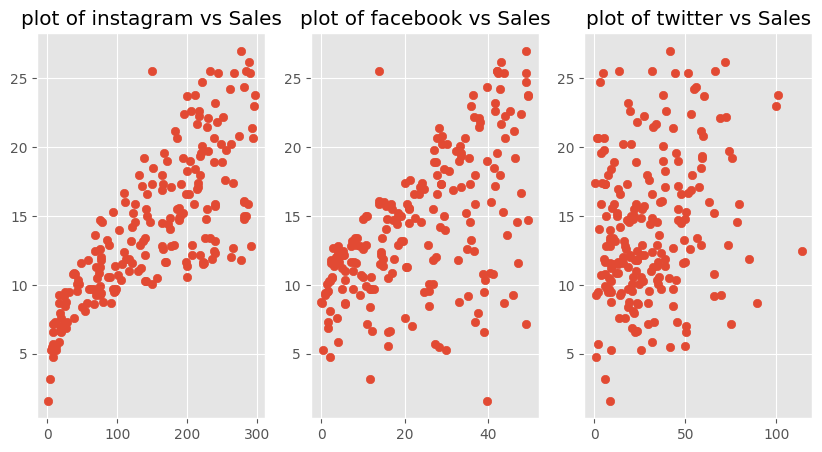

In [9]:
plt.figure(figsize=(10,5))
j=1
for i in df.columns:
    if(i != "Sales"):
        plt.subplot(1,3,j)
        plt.scatter(x=i, y="Sales", data=df)
        plt.title(f"plot of {i} vs Sales")
        j = j+1

In [10]:
df.corr()

,Sales,instagram,facebook,twitter
Sales,1.000000,0.772449,0.567472,0.232974
instagram,0.772449,1.000000,0.061683,0.073092
facebook,0.567472,0.061683,1.000000,0.358184
twitter,0.232974,0.073092,0.358184,1.000000


<Axes: >

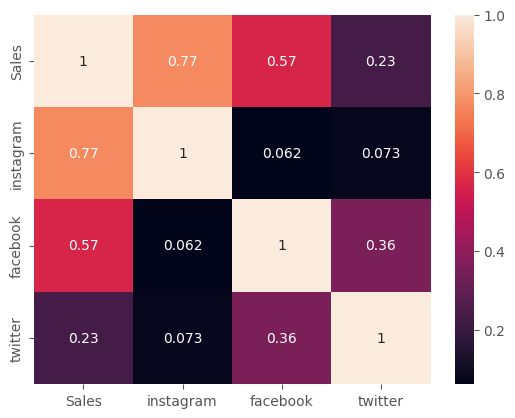

In [11]:
sns.heatmap(df.corr(), annot=True)

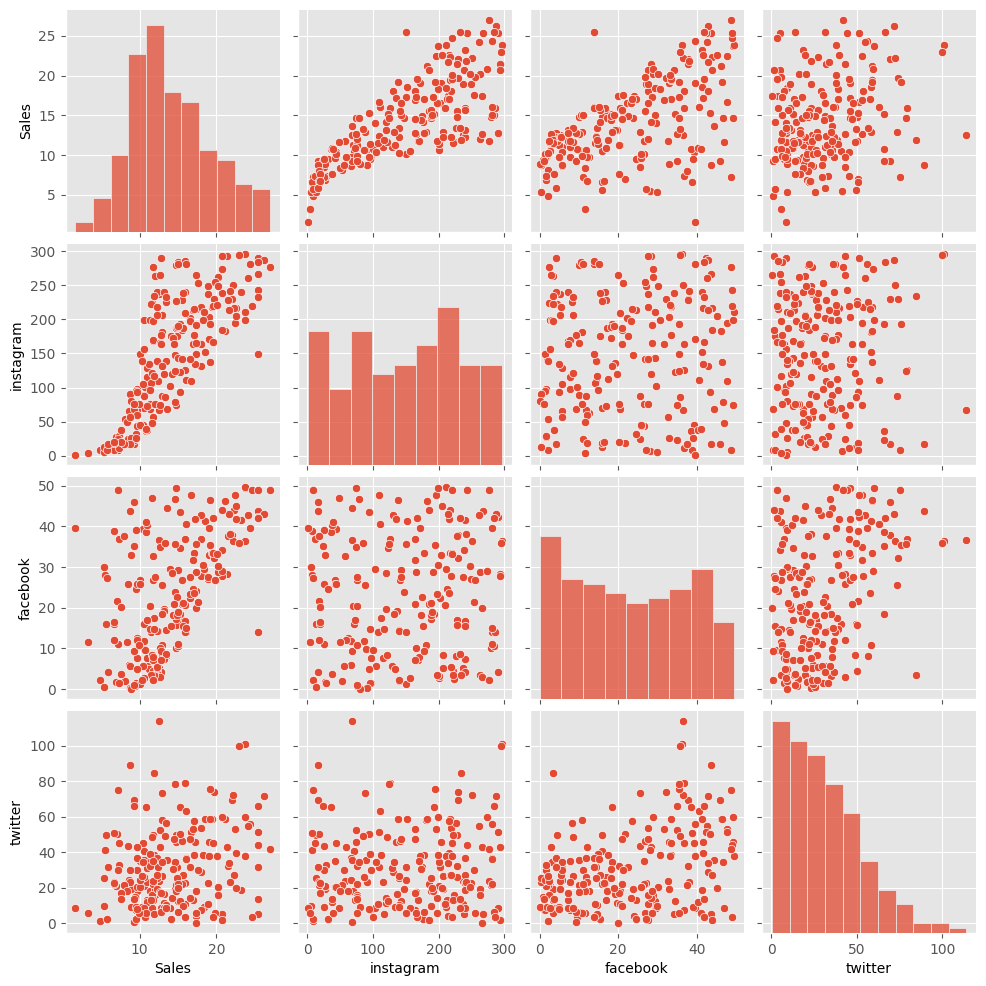

In [12]:
sns.pairplot(df)

In [13]:
X = df.drop(columns=['Sales'], axis=1)
y = df['Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=2)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_predicted = model.predict(X_test)

In [18]:
r2_score(y_predicted, y_test)

0.8100935088636101

In [19]:
np.sqrt(mean_squared_error(y_test, y_predicted))

1.8679062579165102

In [20]:
compaign = [[149,40,33]]
model.predict(compaign)

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.50093175])

In [21]:
test_residuals = y_test - y_predicted

<Axes: xlabel='Sales', ylabel='Density'>

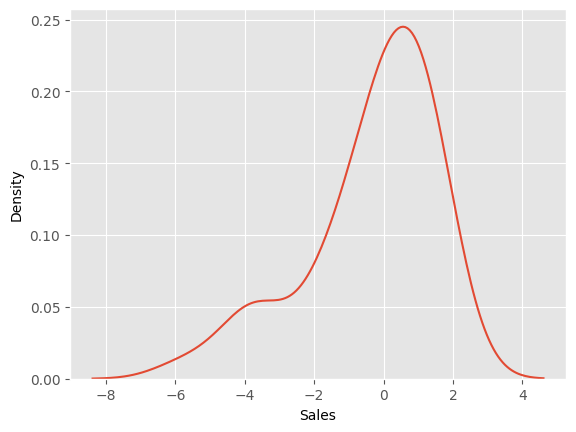

In [22]:
sns.kdeplot(test_residuals)

Text(0, 0.5, 'residuals')

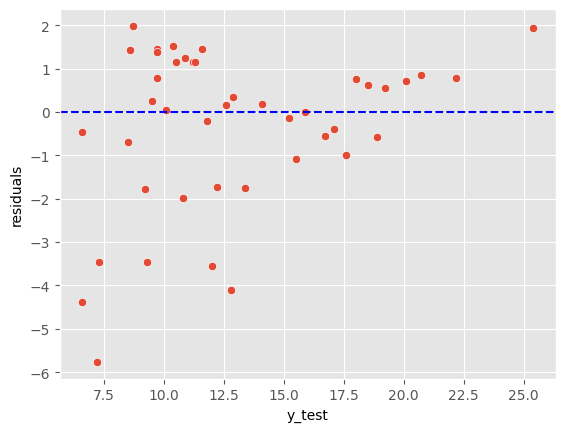

In [24]:
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0,color="blue",ls="--")
plt.xlabel("y_test")
plt.ylabel("residuals")

In [33]:
import statsmodels.api as sm

In [42]:
X_train_sm = X.copy()
X_train_sm = sm.add_constant(X_train_sm)
lm2 = sm.OLS(y, X_train_sm).fit()

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     455.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           3.73e-91
Time:                        12:51:45   Log-Likelihood:                -437.98
No. Observations:                 212   AIC:                             884.0
Df Residuals:                     208   BIC:                             897.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1158      0.346      9.011      0.000       2.434       3.797
instagram      0.0455      0.002     29.304      0.000       0.042       0.049
facebook       0.1880      0.010     19.447      0.000       0.169       0.207
twitter       -0.0022      0.006     -0.342      0.732      -0.015       0.010
==============================================================================
Omnibus:                       63.886   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.988
Skew:                           0.590   Prob(JB):                    6.20e-239
Kurtosis:                      14.081   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""